<a href="https://colab.research.google.com/github/Nathlima1700/biblioteca_pandas/blob/main/Rid212818_desafio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# ============================================
# ETAPA 01 - Upload dos Dados
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

# Fazer upload do arquivo listings_cleaned.csv
print("Por favor, selecione o arquivo 'listings_cleaned.csv'")
uploaded_listings = files.upload()

# Pegar o nome do arquivo enviado
listings_file_name = next(iter(uploaded_listings))

# Ler o arquivo CSV
listings = pd.read_csv(listings_file_name)

# Fazer upload do arquivo reviews.csv
print("\nAgora selecione o arquivo 'reviews.csv'")
uploaded_reviews = files.upload()

# Pegar o nome do arquivo enviado
reviews_file_name = next(iter(uploaded_reviews))

# Ler o arquivo CSV
reviews = pd.read_csv(reviews_file_name)

# Visualizar primeiras linhas
print("\nListings:")
print(listings.head())

print("\nReviews:")
print(reviews.head())

# Conferir estrutura
print("\nEstrutura Listings:")
listings.info()

print("\nEstrutura Reviews:")
reviews.info()


Por favor, selecione o arquivo 'listings_cleaned.csv'


Saving listings_cleaned.csv to listings_cleaned (2).csv

Agora selecione o arquivo 'reviews.csv'


Saving reviews.csv to reviews (2).csv

Listings:
       id neighbourhood_cleansed        room_type  accommodates  bathrooms  \
0  271975                Vidigal  Entire home/apt             4        1.0   
1  272335             Copacabana  Entire home/apt             4        1.0   
2  272631             Copacabana     Private room             2        1.0   
3  273261                 Leblon  Entire home/apt             6        3.5   
4  273363           Santa Teresa     Private room             1        1.0   

   bedrooms  beds   price  
0       2.0   2.0   236.0  
1       1.0   1.0   723.0  
2       1.0   2.0  1146.0  
3       3.0   3.0  6742.0  
4       1.0   1.0    61.0  

Reviews:
       id  number_of_reviews  review_scores_rating
0  272335                367                  4.92
1  272631                 32                  5.00
2  273363                  5                  5.00
3  273463                654                  4.83
4  273496                 60                  4.8

In [17]:
# Juntando os DataFrames com a chave 'id'
df = pd.merge(listings, reviews, left_on='id', right_on='id', how='inner')

# Conferindo o resultado do merge
print("\nDataFrame combinado (df):")
print(df.head())


DataFrame combinado (df):
       id neighbourhood_cleansed        room_type  accommodates  bathrooms  \
0  272335             Copacabana  Entire home/apt             4        1.0   
1  272631             Copacabana     Private room             2        1.0   
2  273261                 Leblon  Entire home/apt             6        3.5   
3  273363           Santa Teresa     Private room             1        1.0   
4  273463                  Lagoa  Entire home/apt             6        2.0   

   bedrooms  beds   price  number_of_reviews  review_scores_rating  
0       1.0   1.0   723.0                367              4.920000  
1       1.0   2.0  1146.0                 32              5.000000  
2       3.0   3.0  6742.0                  0              4.812309  
3       1.0   1.0    61.0                  5              5.000000  
4       2.0   6.0  1411.0                654              4.830000  


In [18]:
# ============================================
# ETAPA 02 - Limpeza e Tratamento de Dados
# ============================================

# Verificando valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Verificando o percentual de valores nulos
print("\nPercentual de valores nulos por coluna:")
print((df.isnull().sum() / df.shape[0]) * 100)


Valores nulos por coluna:
id                        0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
number_of_reviews         0
review_scores_rating      0
dtype: int64

Percentual de valores nulos por coluna:
id                        0.0
neighbourhood_cleansed    0.0
room_type                 0.0
accommodates              0.0
bathrooms                 0.0
bedrooms                  0.0
beds                      0.0
price                     0.0
number_of_reviews         0.0
review_scores_rating      0.0
dtype: float64


In [22]:
# Remover colunas que não são necessárias para análise
colunas_para_remover = ['id', 'listing_id', 'host_id', 'latitude', 'longitude', 'name', 'host_name', 'last_review']
df.drop(columns=colunas_para_remover, inplace=True, errors='ignore')  # errors='ignore' evita erro se não existir a coluna

# Conferindo novamente
print("\nApós limpeza, valores nulos por coluna:")
print(df.isnull().sum())

# Verificando a estrutura do DataFrame após a limpeza
print("\nEstrutura final do DataFrame:")
print(df.info())


Após limpeza, valores nulos por coluna:
neighbourhood_cleansed    0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
number_of_reviews         0
review_scores_rating      0
dtype: int64

Estrutura final do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  32695 non-null  object 
 1   room_type               32695 non-null  object 
 2   accommodates            32695 non-null  int64  
 3   bathrooms               32695 non-null  float64
 4   bedrooms                32695 non-null  float64
 5   beds                    32695 non-null  float64
 6   price                   32695 non-null  float64
 7   number_of_reviews       32695 non-null  int64  
 8   review_scores_rating

Tamanho antes de remover outliers: (32695, 10)
Tamanho após remover outliers: (25933, 10)


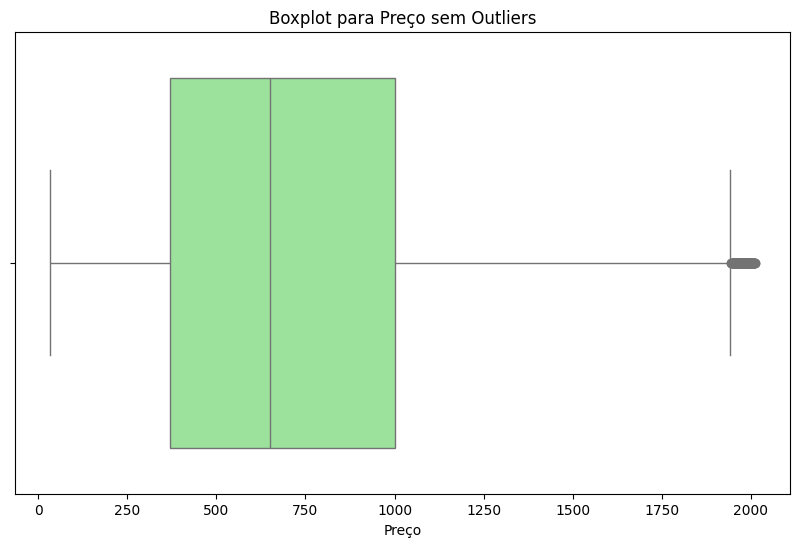

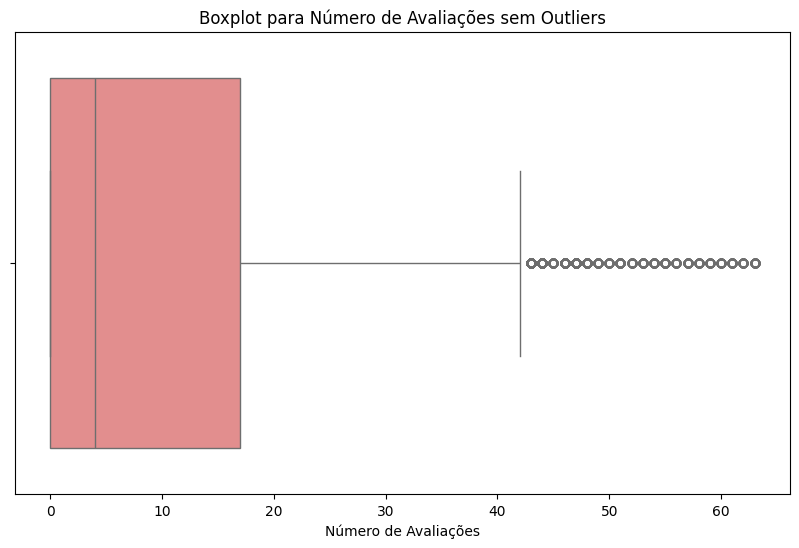

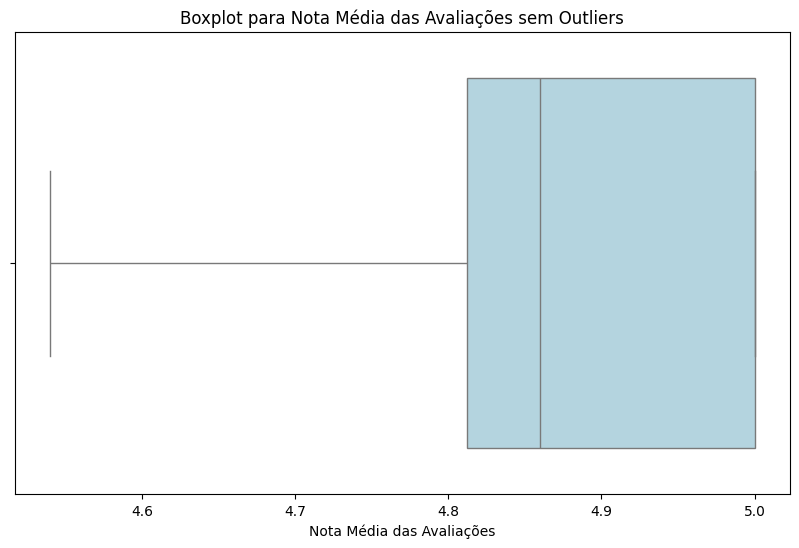

In [25]:
# ============================================
# ETAPA 03 - Tratamento de Outliers (IQR)
# ============================================

# Função para identificar outliers com base no IQR
def identificar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    # Aplicando a função para remover outliers
df_sem_outliers_preco = identificar_outliers(df, 'price')
df_sem_outliers_avaliacoes = identificar_outliers(df_sem_outliers_preco, 'number_of_reviews')
df_sem_outliers_avaliacoes = identificar_outliers(df_sem_outliers_avaliacoes, 'review_scores_rating')

# Verificando o tamanho antes e depois de remover os outliers
print(f"Tamanho antes de remover outliers: {df.shape}")
print(f"Tamanho após remover outliers: {df_sem_outliers_avaliacoes.shape}")

# Visualizando os boxplots após a remoção dos outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sem_outliers_avaliacoes['price'], color='lightgreen')
plt.title('Boxplot para Preço sem Outliers')
plt.xlabel('Preço')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sem_outliers_avaliacoes['number_of_reviews'], color='lightcoral')
plt.title('Boxplot para Número de Avaliações sem Outliers')
plt.xlabel('Número de Avaliações')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sem_outliers_avaliacoes['review_scores_rating'], color='lightblue')
plt.title('Boxplot para Nota Média das Avaliações sem Outliers')
plt.xlabel('Nota Média das Avaliações')
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler

# ============================================
# ETAPA 04 - Transformação de Dados Categóricos e Normalização
# ============================================

# 1. Transformando dados categóricos em numéricos
df['room_type'] = df['room_type'].astype('category').cat.codes  # Converte 'room_type' para numérico
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category').cat.codes  # Converte 'neighbourhood_cleansed'

# 2. Normalizando os dados numéricos (como 'price')
scaler = StandardScaler()

# Normalizando o preço para ter média 0 e desvio padrão 1
df['price_normalized'] = scaler.fit_transform(df[['price']])

# Conferindo o resultado da normalização e transformação
print("\nDados transformados e normalizados:")
print(df[['room_type', 'neighbourhood_cleansed', 'price', 'price_normalized']].head())


Dados transformados e normalizados:
   room_type  neighbourhood_cleansed   price  price_normalized
0          0                      31   723.0         -0.114820
1          2                      31  1146.0          0.695014
2          0                      76  6742.0         11.408553
3          2                     120    61.0         -1.382218
4          0                      74  1411.0          1.202356


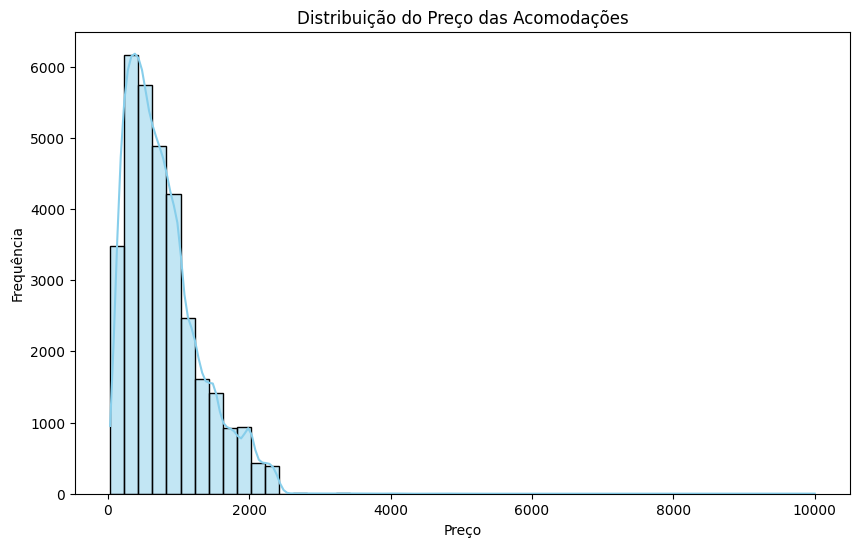

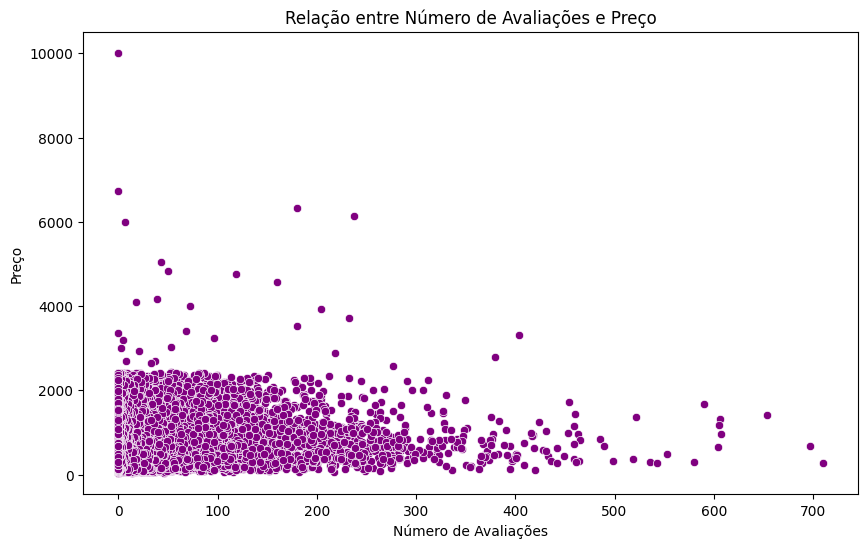

<ipython-input-26-91961b3ef6c7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='coolwarm')


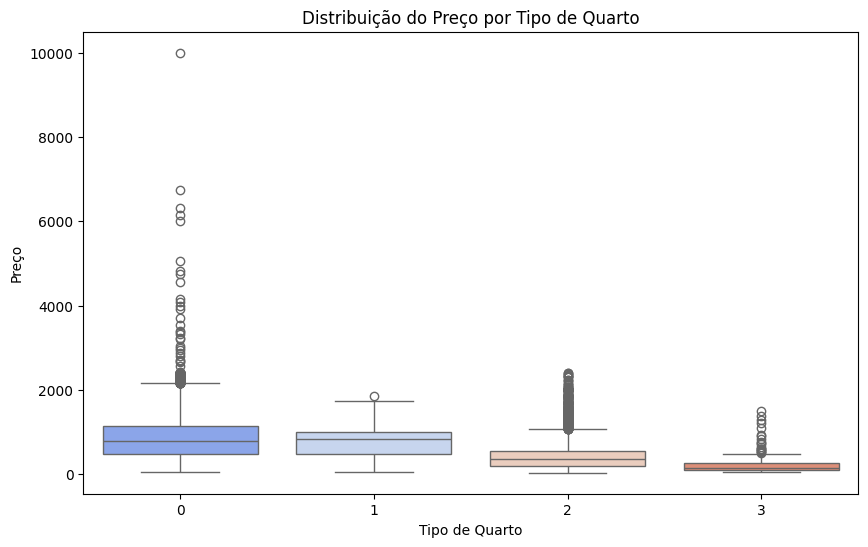

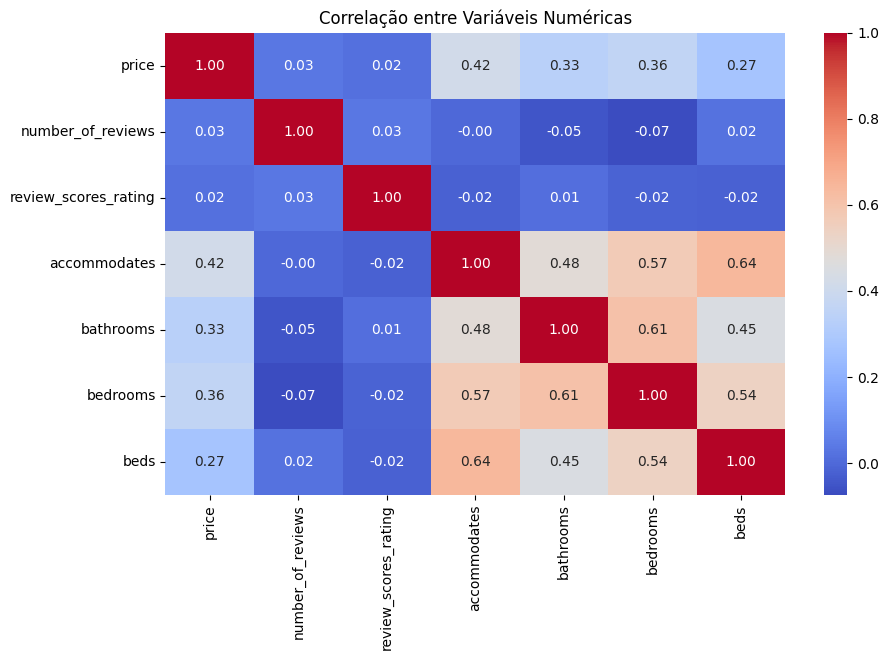

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# ETAPA 05 - Análise Exploratória dos Dados (EDA)
# ============================================

# 1. Visualizando a distribuição do preço
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição do Preço das Acomodações')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# 2. Visualizando a relação entre preço e número de avaliações
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, color='purple')
plt.title('Relação entre Número de Avaliações e Preço')
plt.xlabel('Número de Avaliações')
plt.ylabel('Preço')
plt.show()

# 3. Visualizando a relação entre preço e tipo de quarto (room_type)
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='coolwarm')
plt.title('Distribuição do Preço por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço')
plt.show()

# 4. Correlação entre variáveis numéricas (usando heatmap)
correlation_matrix = df[['price', 'number_of_reviews', 'review_scores_rating', 'accommodates', 'bathrooms', 'bedrooms', 'beds']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()